# **Case Study - Customer churn Prediction**

--------------------

## **Context**

--------------------
Customer churn prediction project based on Telecom batabase from Kaggle

--------------------

## **Objectives**

* Identify the different factors that drive customer churn
* Build a model to predict if a customer will churn or not

## **Importing the libraries and overviewing the dataset**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scalers and encoders
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the dataset**

In [59]:
# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

# Loading the dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [60]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Checking the info contained in the dataset**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### **Notes**:

1. There are 7043 observations of customers, with 21 columns (1 ID, 19 Features, 1 Target)
2. There are no missing values in any of the columns

#### **Checking unique values in each column**

In [63]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [64]:
# print the unique values from each column of 'data'
for col in df.columns:
    print(col, df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

#### **Notes**:
1. CustomerID is useless for our analysis, so we should drop it
2. We will have to convert 'TotalCharges' into a numerical value

In [65]:
# Dropping the 'customerID' column
df=df.drop(['customerID'], axis=1)

In [66]:
# convert the 'TotalCharges' column to a numeric data type.
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### **Notes**:
1. There are some missing values in the TotalCharges columns, which can be approximated by multiplying 'tenure' and 'MonthlyCharges'

In [71]:
# Inputing missing values
mask = df['TotalCharges'].isna()
df.loc[mask, 'TotalCharges'] = df[mask].apply(lambda row: row['tenure'] * row['MonthlyCharges'], axis=1)

In [79]:
df.loc[mask, ['TotalCharges', 'tenure', 'MonthlyCharges']]

,TotalCharges,tenure,MonthlyCharges
488,0.0,0,52.55
753,0.0,0,20.25
936,0.0,0,80.85
1082,0.0,0,25.75
1340,0.0,0,56.05
3331,0.0,0,19.85
3826,0.0,0,25.35
4380,0.0,0,20.00
5218,0.0,0,19.70
6670,0.0,0,73.35


#### **Notes**:
1. Some new customers have missing information on 'tenure' and 'TotalCharges'
2. Let's proceed like this, and we can later assess if it require to be replaced/dropped

### **Selecting numerical and categorical columns**

In [82]:
# Selecting categorical and numerical features
cat_features = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

## **Exploratory Data Analysis and Data Preproessing**

### **Univariate analysis of numerical features**

In [83]:
# Checking summary statistics
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


#### **Exploring these variables more depth by observing their distributions**

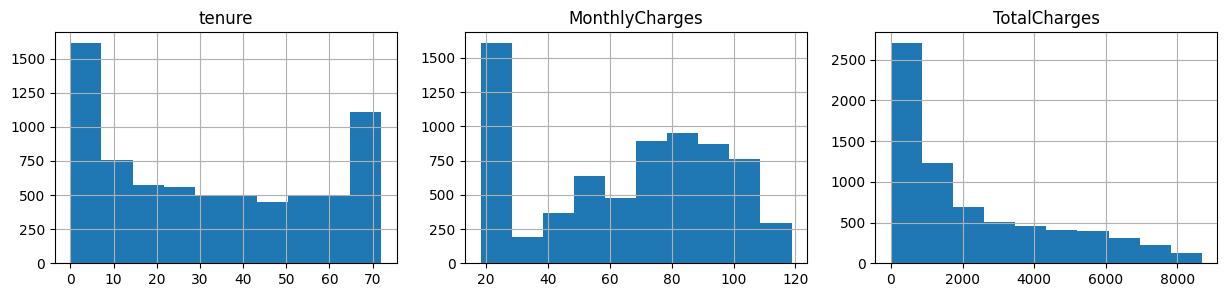

In [93]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[num_features[0]].hist(ax=ax[0])
ax[0].set_title(num_features[0])
df[num_features[1]].hist(ax=ax[1])
ax[1].set_title(num_features[1])
df[num_features[2]].hist(ax=ax[2])
ax[2].set_title(num_features[2])
plt.show()

### **Univariate analysis of categorical features**

In [96]:
# Printing the % sub categories of each category
for feat in cat_features:
    print(df[feat].value_counts(normalize=True))
    print('*'*40)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64
****************************************
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
****************************************
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64
****************************************
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64
****************************************
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64
****************************************
Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64
****************************************
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64
****************************************
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64
****************************************
No                     0.496663
Yes                    0